Heart diseases predictions with ANN and data prerpocessing. 

In [558]:
import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [559]:
data = pd.read_csv("/Users/maxkucher/data_handling/ML_projects/heart_disease_data.csv")

In [560]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [561]:
data["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [562]:
maj = data[data["target"] == 1]
min = data[data["target"] == 0]

In [563]:
maj 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


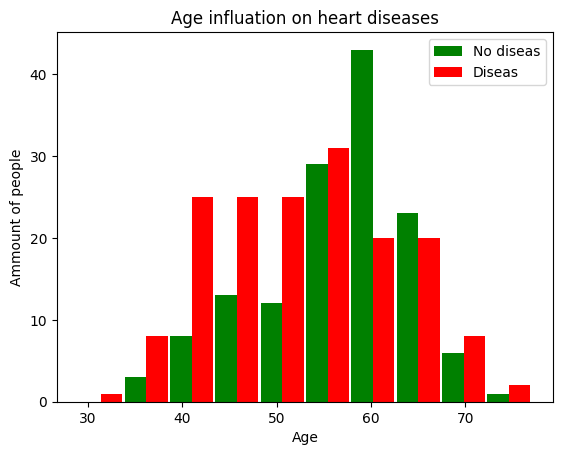

In [564]:
des = data[data["target"] == 1].age
no_des = data[data["target"] == 0].age

plt.xlabel("Age")
plt.ylabel("Ammount of people")
plt.title("Age influation on heart diseases")

plt.hist([no_des, des], rwidth=0.95, color=['green','red'],label=['No diseas','Diseas'])
plt.legend()

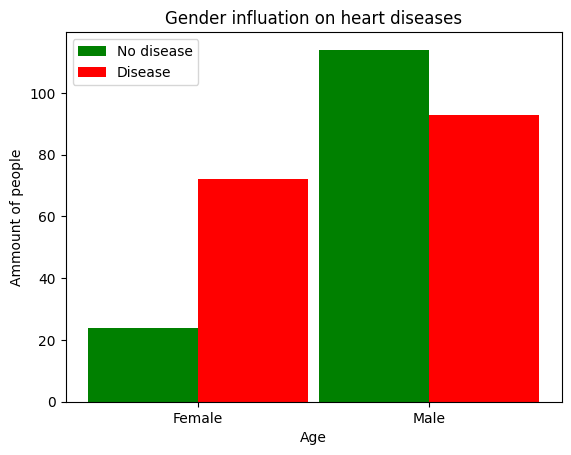

In [565]:
des = data[data["target"] == 1].sex
no_des = data[data["target"] == 0].sex

plt.xlabel("Age")
plt.ylabel("Ammount of people")
plt.title("Gender influation on heart diseases")

plt.hist([no_des, des], bins=[-0.5, 0.5, 1.5], rwidth=0.95, color=['green','red'], label=['No disease', 'Disease'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend()
plt.show()

In [566]:
min = min.sample(len(maj), replace=True, random_state=42)
min

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


In [567]:
data = pd.concat([min, maj], ignore_index=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
1,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
2,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
3,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
4,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
326,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
327,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
328,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [568]:
data["target"].value_counts()

target
0    165
1    165
Name: count, dtype: int64

In [569]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [570]:
columns_to_scale = ["age", "trestbps", "chol", "thalach"]
scaler = MinMaxScaler()

for column in columns_to_scale:
    data[column] = scaler.fit_transform(data[[column]])

In [571]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.425532,1,2,0.226415,0.052511,0,0,0.419847,0,0.8,2,3,2,0
1,0.446809,1,0,0.471698,0.168950,0,0,0.419847,1,0.9,1,0,3,0
2,0.595745,1,0,0.528302,0.342466,0,0,0.312977,1,0.6,1,1,1,0
3,0.680851,1,3,0.377358,0.246575,0,1,0.564885,0,2.6,1,2,2,0
4,0.617021,1,0,0.292453,0.397260,0,0,0.763359,0,0.0,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.574468,1,1,0.245283,0.260274,0,1,0.748092,0,0.0,0,0,2,1
326,0.553191,0,1,0.358491,0.493151,0,1,0.725191,0,1.2,2,0,2,1
327,0.255319,1,1,0.245283,0.070776,0,1,0.847328,0,0.0,2,0,2,1
328,0.191489,1,2,0.415094,0.111872,0,1,0.778626,0,0.0,2,4,2,1


In [572]:
data["slope"].value_counts()

slope
2    160
1    150
0     20
Name: count, dtype: int64

In [573]:
data["ca"].value_counts()

ca
0    186
1     67
2     52
3     20
4      5
Name: count, dtype: int64

In [574]:
data["thal"].value_counts()

thal
2    170
3    137
1     21
0      2
Name: count, dtype: int64

In [575]:
data["cp"].value_counts()

cp
0    163
2     89
1     53
3     25
Name: count, dtype: int64

In [576]:
columns_to_preprocess = ["slope", "ca", "thal", "cp"]


processed_data = pd.DataFrame()

for column in columns_to_preprocess:
    dummies = pd.get_dummies(data[column], prefix=column)
    processed_data = pd.concat([processed_data, dummies], axis="columns")
    data = data.drop(column, axis="columns")

In [577]:
processed_data

,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,cp_0,cp_1,cp_2,cp_3
0,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False
1,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True
4,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
326,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False
327,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False
328,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False


In [578]:
data = pd.concat([processed_data, data], axis="columns")
data

,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,...,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,False,False,True,False,False,False,True,False,False,False,...,0.425532,1,0.226415,0.052511,0,0,0.419847,0,0.8,0
1,False,True,False,True,False,False,False,False,False,False,...,0.446809,1,0.471698,0.168950,0,0,0.419847,1,0.9,0
2,False,True,False,False,True,False,False,False,False,True,...,0.595745,1,0.528302,0.342466,0,0,0.312977,1,0.6,0
3,False,True,False,False,False,True,False,False,False,False,...,0.680851,1,0.377358,0.246575,0,1,0.564885,0,2.6,0
4,False,False,True,False,False,True,False,False,False,False,...,0.617021,1,0.292453,0.397260,0,0,0.763359,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,True,False,False,True,False,False,False,False,False,False,...,0.574468,1,0.245283,0.260274,0,1,0.748092,0,0.0,1
326,False,False,True,True,False,False,False,False,False,False,...,0.553191,0,0.358491,0.493151,0,1,0.725191,0,1.2,1
327,False,False,True,True,False,False,False,False,False,False,...,0.255319,1,0.245283,0.070776,0,1,0.847328,0,0.0,1
328,False,False,True,False,False,False,False,True,False,False,...,0.191489,1,0.415094,0.111872,0,1,0.778626,0,0.0,1


In [579]:
data.isnull().sum()

slope_0     0
slope_1     0
slope_2     0
ca_0        0
ca_1        0
ca_2        0
ca_3        0
ca_4        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [580]:

columns = ["slope_0", "slope_1", "slope_2", "ca_0", "ca_1", "ca_2", "ca_3", "ca_4", "thal_0", "thal_1", "thal_2", "thal_3", "cp_0", "cp_1", "cp_2", "cp_3"]

for column in columns:
    data.replace({column: {True: 1, False: 0}}, inplace=True)

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_36446/470511465.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({column: {True: 1, False: 0}}, inplace=True)


In [581]:
data

,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,...,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,0,0,1,0,0,0,1,0,0,0,...,0.425532,1,0.226415,0.052511,0,0,0.419847,0,0.8,0
1,0,1,0,1,0,0,0,0,0,0,...,0.446809,1,0.471698,0.168950,0,0,0.419847,1,0.9,0
2,0,1,0,0,1,0,0,0,0,1,...,0.595745,1,0.528302,0.342466,0,0,0.312977,1,0.6,0
3,0,1,0,0,0,1,0,0,0,0,...,0.680851,1,0.377358,0.246575,0,1,0.564885,0,2.6,0
4,0,0,1,0,0,1,0,0,0,0,...,0.617021,1,0.292453,0.397260,0,0,0.763359,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1,0,0,1,0,0,0,0,0,0,...,0.574468,1,0.245283,0.260274,0,1,0.748092,0,0.0,1
326,0,0,1,1,0,0,0,0,0,0,...,0.553191,0,0.358491,0.493151,0,1,0.725191,0,1.2,1
327,0,0,1,1,0,0,0,0,0,0,...,0.255319,1,0.245283,0.070776,0,1,0.847328,0,0.0,1
328,0,0,1,0,0,0,0,1,0,0,...,0.191489,1,0.415094,0.111872,0,1,0.778626,0,0.0,1


In [582]:
x = data.drop("target", axis="columns")
y = data["target"]

In [583]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [584]:
x_train.shape

(264, 25)

In [585]:
model = Sequential([

    Dense(22, input_shape=(25, ), activation="relu"),
    Dense(18, activation="relu"),
    Dense(15, activation="relu"),
    Dense(11, activation="relu"),
    Dense(7, activation="relu"),
    Dense(10, activation="relu"),
    Dense(8, activation="relu"),
    Dense(5, activation="relu"),
    Dense(3, activation="relu"),
    Dense(1, activation="sigmoid")


])


model.compile(
    optimizer="SGD",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)


In [586]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500


9/9 [==============================] - 1s 1ms/step - loss: 0.6946 - accuracy: 0.5038
Epoch 2/500
9/9 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 3/500
9/9 [==============================] - 0s 822us/step - loss: 0.6921 - accuracy: 0.4886
Epoch 4/500
9/9 [==============================] - 0s 898us/step - loss: 0.6911 - accuracy: 0.4886
Epoch 5/500
9/9 [==============================] - 0s 818us/step - loss: 0.6899 - accuracy: 0.4697
Epoch 6/500
9/9 [==============================] - 0s 942us/step - loss: 0.6889 - accuracy: 0.4811
Epoch 7/500
9/9 [==============================] - 0s 742us/step - loss: 0.6880 - accuracy: 0.4811
Epoch 8/500
9/9 [==============================] - 0s 844us/step - loss: 0.6866 - accuracy: 0.5114
Epoch 9/500
9/9 [==============================] - 0s 830us/step - loss: 0.6853 - accuracy: 0.5530
Epoch 10/500
9/9 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5341
Epoch 11/500
9/9 [=========

In [587]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.8939


[0.5484914183616638, 0.8939393758773804]

In [588]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 22)                572       
                                                                 
 dense_79 (Dense)            (None, 18)                414       
                                                                 
 dense_80 (Dense)            (None, 15)                285       
                                                                 
 dense_81 (Dense)            (None, 11)                176       
                                                                 
 dense_82 (Dense)            (None, 7)                 84        
                                                                 
 dense_83 (Dense)            (None, 10)                80        
                                                                 
 dense_84 (Dense)            (None, 8)                

In [589]:
predictions = []
preds = model.predict(x_test)
for pred in preds:
    if pred >= 0.5:
        pred = 1
        predictions.append(pred)
    elif pred < 0.5:
        pred = 0
        predictions.append(pred)

3/3 [==============================] - 0s 1ms/step


In [590]:
predictions = np.array(predictions)
predictions

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [591]:
pred_frame = pd.DataFrame({"predictions: ": predictions.squeeze(), "Actuals: ": y_test.squeeze()})
pred_frame

,predictions:,Actuals:
177,1,1
241,1,1
64,0,0
15,0,0
300,1,1
...,...,...
16,0,0
87,0,0
62,0,0
268,1,1


In [592]:
total_pred = model.predict(x)
total_preds = []

for pred in total_pred:
    if pred >= 0.5:
        pred = 1
        total_preds.append(pred)
    elif pred < 0.5:
        pred = 0
        total_preds.append(pred)


total_preds = np.array(total_preds)
total_preds

11/11 [==============================] - 0s 677us/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [593]:
data["Predictions"] = total_preds
data

,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,...,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,Predictions
0,0,0,1,0,0,0,1,0,0,0,...,1,0.226415,0.052511,0,0,0.419847,0,0.8,0,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0.471698,0.168950,0,0,0.419847,1,0.9,0,0
2,0,1,0,0,1,0,0,0,0,1,...,1,0.528302,0.342466,0,0,0.312977,1,0.6,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0.377358,0.246575,0,1,0.564885,0,2.6,0,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0.292453,0.397260,0,0,0.763359,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1,0,0,1,0,0,0,0,0,0,...,1,0.245283,0.260274,0,1,0.748092,0,0.0,1,1
326,0,0,1,1,0,0,0,0,0,0,...,0,0.358491,0.493151,0,1,0.725191,0,1.2,1,1
327,0,0,1,1,0,0,0,0,0,0,...,1,0.245283,0.070776,0,1,0.847328,0,0.0,1,1
328,0,0,1,0,0,0,0,1,0,0,...,1,0.415094,0.111872,0,1,0.778626,0,0.0,1,1


In [594]:
cm = confusion_matrix(y_test, predictions)
cm

array([[30,  1],
       [ 6, 29]])

Text(50.722222222222214, 0.5, 'Actuals')

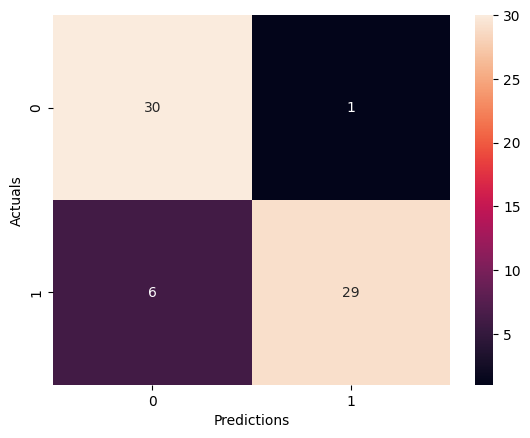

In [595]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
